# 회귀분석(Regression Analysis) - 예측

## 실습용 데이터 설정
* Cars.csv

In [2]:
!ls

Cars.csv  sample_data


* pandas DataFrame

In [3]:
import pandas as pd

DF = pd.read_csv('Cars.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [4]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


# I. Simple Linear Regression

> ## 1) 분석 변수 선택

In [5]:
DF1 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]
DF1.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436


> ## 2) 상관관계 그래프

* matplotlib

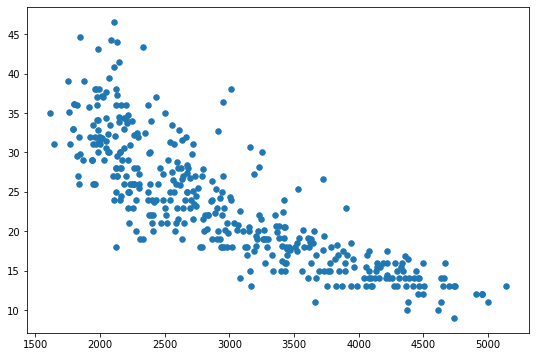

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

* seaborn

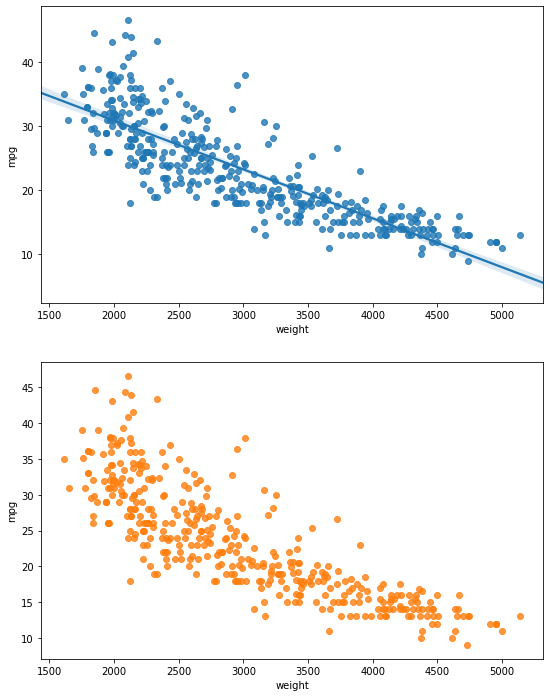

In [7]:
import seaborn as sns
fig = plt.figure(figsize = (9, 12))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(x = 'weight', y = 'mpg', data = DF1, ax = ax1)
sns.regplot(x = 'weight', y = 'mpg', data = DF1, ax = ax2, fit_reg = False)
plt.show()

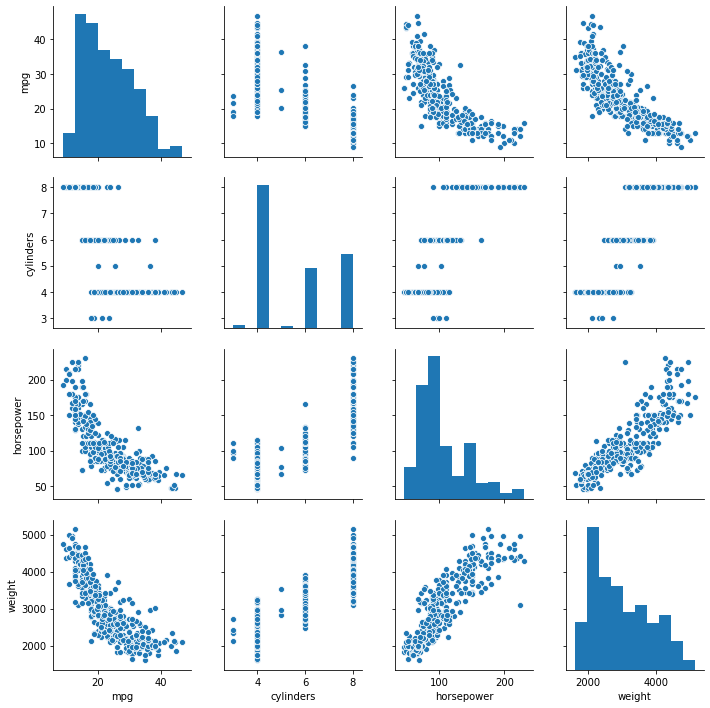

In [8]:
sns.pairplot(DF1)  
plt.show()

> ## 3) 상관계수(Correlation Coefficient)

* Pearson's r

In [0]:
from scipy import stats

stats.pearsonr(DF1.weight, DF1.mpg)[0]

-0.8322442148315753

> ## 4) Train & Test Split

* 7:3

In [9]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape)
print('Test Data : ', X_test.shape)

Train Data :  (274, 1)
Test Data :  (118, 1)


> ## 5) 선형회귀 Modeling

* 모델 생성

In [10]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Weight 및 Bias

In [11]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [-0.00778703]
bias(b) :  46.76767731248286


* 결정계수(R-Sqaure)

In [12]:
RA.score(X_test, y_test)

0.7723839268443395

> ## 6) 모델 평가

* Mean Squared Error

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, RA.predict(X_test))

11.373420847734232

> ## 7) Visualization

* y vs. y_hat

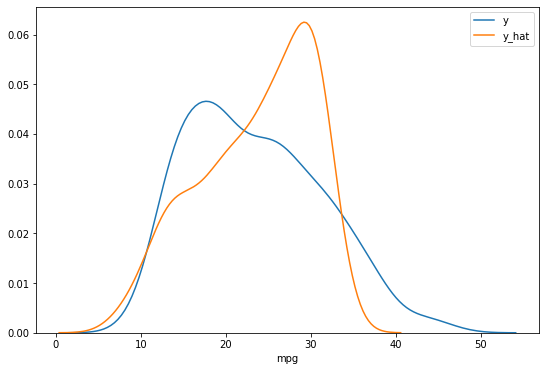

In [14]:
y_hat = RA.predict(X)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label='y_hat', ax = ax1)
plt.show()

# II. Nonlineare Regression

> ## 1) 분석 변수 선택

In [15]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]
DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436


> ## 2) Train & Test Split

* 7:3

In [16]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape)
print('Test Data : ', X_test.shape)

Train Data :  (274, 1)
Test Data :  (118, 1)


> ## 3) 비선형회귀 Modeling

* 2차 다항식 변환

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


* 비션형 모델 생성

In [18]:
NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Weight 및 Bias

In [19]:
print('weight(w) : ', NL.coef_)
print('bias(b) : ', NL.intercept_)

weight(w) :  [ 0.00000000e+00 -1.91478542e-02  1.77860918e-06]
bias(b) :  63.55586061101961


* 결정계수(R-Sqaure)

In [20]:
X_test_poly = poly.fit_transform(X_test)

NL.score(X_test_poly,y_test)

0.8007081100551413

> ## 4) 모델 평가

* Mean Squared Error

In [0]:
from sklearn.metrics import mean_squared_error

X_test_poly = poly.fit_transform(X_test)
mean_squared_error(y_test, NL.predict(X_test_poly))

9.958130392369634

> ## 5) Visualization

* Nonlinear Model

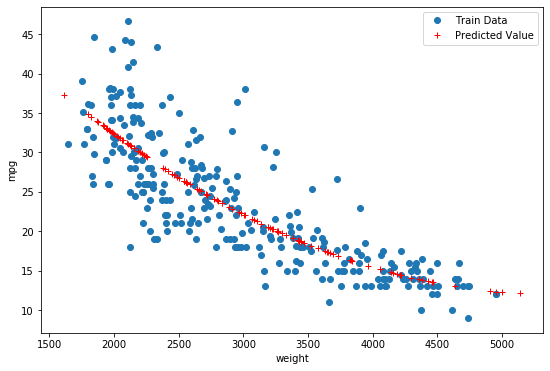

In [0]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

* y vs. y_hat

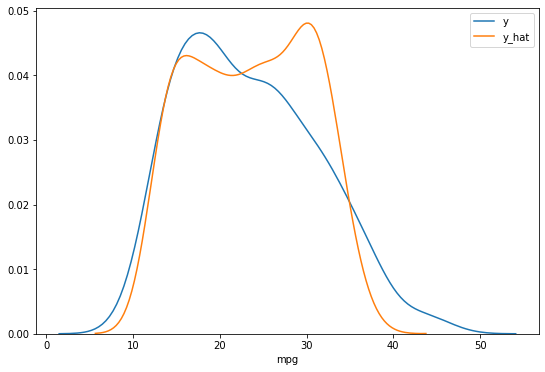

In [0]:
X_ploy = poly.fit_transform(X)
y_hat = NL.predict(X_ploy)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()

# III. Multivariate Regression

> ## 1) 분석 변수 선택

In [21]:
DF3 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]
DF3.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436


> ## 2) Train &Test Split

> 7:3

In [22]:
from sklearn.model_selection import train_test_split

X = DF3[['cylinders', 'horsepower', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape)
print('Test Data : ', X_test.shape)

Train Data :  (274, 3)
Test Data :  (118, 3)


> ## 3) 다중회귀 Modeling

* 모델 생성

In [23]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()   
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Weight 및 Bias

In [24]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', MR.intercept_)

weight(w) :  [-0.23819436 -0.05503975 -0.00516378]
bias(b) :  46.02586011810611


* 결정계수(R-Sqaure)

In [25]:
MR.score(X_test, y_test)

0.7787861688539265

> ## 4) 모델 평가

* Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

11.053516406301046

> ## 5) Visualization

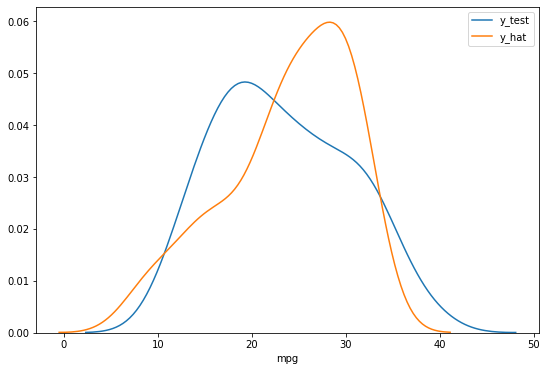

In [27]:
y_hat = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label='y_hat', ax = ax1)
plt.show()

# 
# 
# 
# The End
# 
# 
# 